<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300_P4_C1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 01 : iris 데이터로 기본적인 군집분석(clustering) 원리와 분석 과정을 연습해보자.

## Step0: 군집분석의 기본지식 및 학습목표 확인

### **군집분석이란**?  
: **unsupervised learning**으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐 가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러 가지가 있다. 

### **군집분석의 기본지식**  
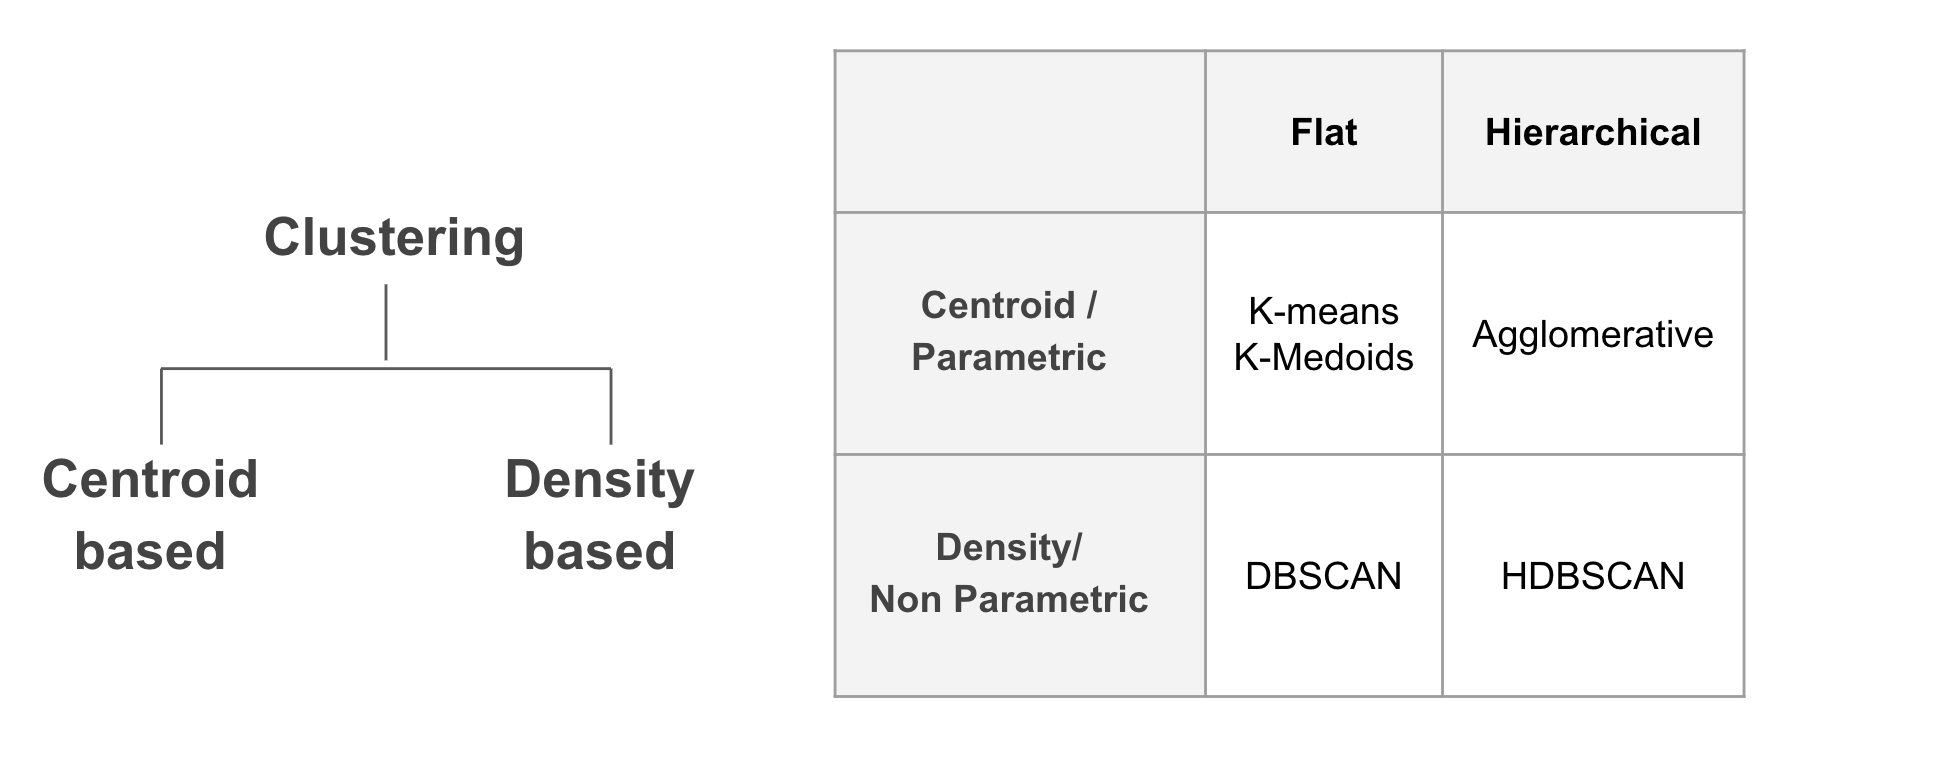


### **학습목표**
```
- 군집분석(Clustering)의 다양한 알고리즘을 경험.
- 알고리즘 훈련에 필요한 파라미터를 알맞게 조절.
- 알고리즘 훈련 결과를 시각화, 수치화를 통해 평가.
- 서로 다른 알고리즘의 차이점을 이해.
``` 

## Step1: 데이터 불러오기 & 전처리

In [ ]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# iris 데이터 셋 불러오기
iris = load_iris()

# array 형태를 DataFrame으로 변환.
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 문제 1. EDA - 컬럼명 재할당하기 
: 컬럼명을 아래와 같이 변경해줍니다.  

변경전 -> 변경후    
`sepal length` -> `sepal_length`  
`sepal width` -> `sepal_width`  
`petal length` -> `petal_length`  
`petal length` -> `petal_width`  

In [ ]:
# 컬럼명을 사용하기 편하게 변경.
columns_name_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 방법1: 순서대로 입력.
#iris_df.columns = columns_name_list

# 방법2: dictionary형태를 사용
column_replace_dict = {k:v for k, v in zip(iris.feature_names, columns_name_list)}
iris_df.rename(column_replace_dict, axis='columns', inplace=True) # axis ='columns >> axis=1 가능.
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# target 칼럼 추가.
iris_df['target'] = iris.target
iris_df.target.unique()

array([0, 1, 2])

### 문제 2. EDA - 결측값 확인하기  
: 각 컬럼의 결측값을 확인하고 결측값을 채워줍니다.

In [ ]:
# 간단하게 컬럼별 결측값 유뮤 확실
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### 문제 3. EDA - 데이터 시각화 해보기
: 각 컬럼의 특징을 파악하고 시각화를 통해 데이터의 분포를 확인합니다.

In [ ]:
# 컬럼별 데이터 type을 확인.
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [ ]:
# 컬럼별 분포 특징 확인
# 분위수를 확인해 정규화과정이 필요한지 생각해보기.
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# plotly를 사용해 scatter plot 시각화하기.

# plotly 모듈 import.
# plotly에서 express 사용하기.
import plotly.express as px

# scatter plot 생성.
fig = px.scatter(iris_df, x='sepal_width', y='sepal_length')

# 그래프 사이즈 조절
fig.update_layout(width=600, height=500)

# 그래프 확인
3fig.show()

In [ ]:
# scatter plot에 target 컬럼 색으로 나타내기.
fig = px.scatter(iris_df, x='sepal_width', y='sepal_length', color='target')
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# 다른 컬럼으로 scatter plot 만들기.
fig = px.scatter(iris_df, x='petal_width', y='petal_length', color='target')
fig.update_layout(width=600, height=500)
fig.show()

## Step2: Clustering : K-Means 알고리즘

### 문제 4. Clustering : K-Means - K-Means 모듈 탐색하기.

In [12]:
# K Means 모듈 import
from sklearn.cluster import KMeans

### 문제 5. Clustering : K-Means - train, test set으로 분리하기.

In [13]:
# iris 데이터를 X, Y로 나누기
X = iris_df.iloc[:, :-1]
Y = iris_df.iloc[:, -1]

# train/test 8:2 비율로 나누기
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=1)
print(len(train_x), len(test_x))

120 30


### 문제 6. Clustering : K-Means - K-Means 모듈 훈련시키기.

In [14]:
# 5개의 그룹으로 clustering 해보기
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [15]:
# train set을 훈련시키고 cluster 결과를 확인.
km.fit(train_x)
clusters_array = km.labels_
print(clusters_array)

[4 3 0 2 2 1 0 1 4 2 2 1 4 2 4 3 1 1 1 0 1 1 3 2 3 2 4 4 3 0 1 4 4 1 1 2 1
 4 2 4 4 2 4 1 0 4 2 0 2 0 1 1 1 2 1 4 2 4 1 1 0 1 3 4 3 2 4 2 3 0 1 0 1 0
 4 1 4 1 1 2 4 2 1 1 4 1 4 1 2 0 1 2 1 0 1 0 0 1 1 0 1 4 4 1 4 0 4 4 4 1 1
 4 0 3 0 4 2 4 2 1]


In [17]:
# 실제 iris데이터와 훈련된 cluster의 결과를 비교.
compare_clusters = dict(zip(clusters_array, train_y))
print(compare_clusters)

{4: 1, 3: 2, 0: 1, 2: 2, 1: 0}


In [18]:
# 훈련된 label 기준으로 시각화.
fig = px.scatter(train_x, x='petal_width', y='petal_length', color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [19]:
# 훈련된 label 기준으로 시각화.
fig = px.scatter(train_x, x='sepal_width', y='sepal_length', color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [20]:
# Sum of squared distances of samples to their closest cluster center.
# [참고] k-means 알고리즘의 특성상, 훈련할때마다 km.inertia_ 값도 차이가 생깁니다.
km.inertia_

35.699845463911686

### 문제 7. Clustering : K-Means - 최적의 k 찾기 (Elbow method).
: unsupervised 방법이므로 실제로 k(cluster 수)는 정해져 있지 않습니다. 따라서 최적의 k를 찾는 것부터 시작하게 됩니다. 

```
최적의 k를 찾는 것이 k-means의 전체과정 중에서 가장 중요한 step입니다.
```

> "Elbow method"란?  
: **Total intra-cluster variation (or total within-cluster sum of square (=WSS))**가 최소가 되는 k를 찾는 방법.




In [22]:
# elbow method를 사용해 최적의 k를 찾기
# # k와 sum of squared distances from each point의 합(distortions)을 비교합니다.

distortions = []
k_range = range(1, 11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[549.0235000000001, 123.1564001234949, 63.861880396389324, 45.493943093943095, 35.699845463911686, 30.798866570661705, 26.5167182996387, 23.80384092584402, 22.005717362316048, 21.2719623015873]


In [24]:
# elbow method 그래프를 통해 이해하기
# X축이 k의 수, y축이 distortions인 line plot을 그린다.
fig = px.line(x=k_range, y=distortions, labels={'x':'k', 'y':'distortions'})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 8. Clustering : K-Means - 최적의 k 찾기 (KElbowVisualizer 사용해보기).
: model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer를 사용해봅니다.  
> Yellowbrick extends the Scikit-Learn API to make a model selection and hyperparameter tuning easier.


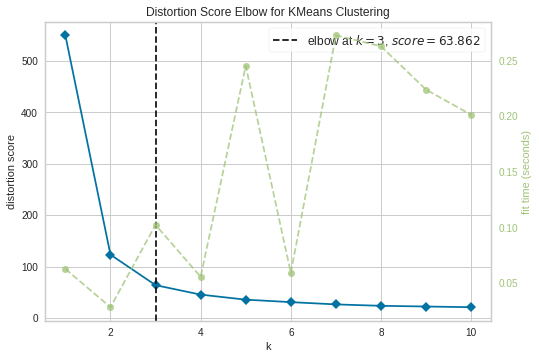

In [25]:
# KElbowVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11))
visualizer.fit(train_x)
visualizer.poof()

### 문제 9. Clustering : K-Means - 최적의 k 찾기 (kneed 모듈 사용해보기).
: 그래프를 확인하지 않고도 최적의 k값을 자동으로 찾아주는 모듈인 kneed를 사용해봅니다.

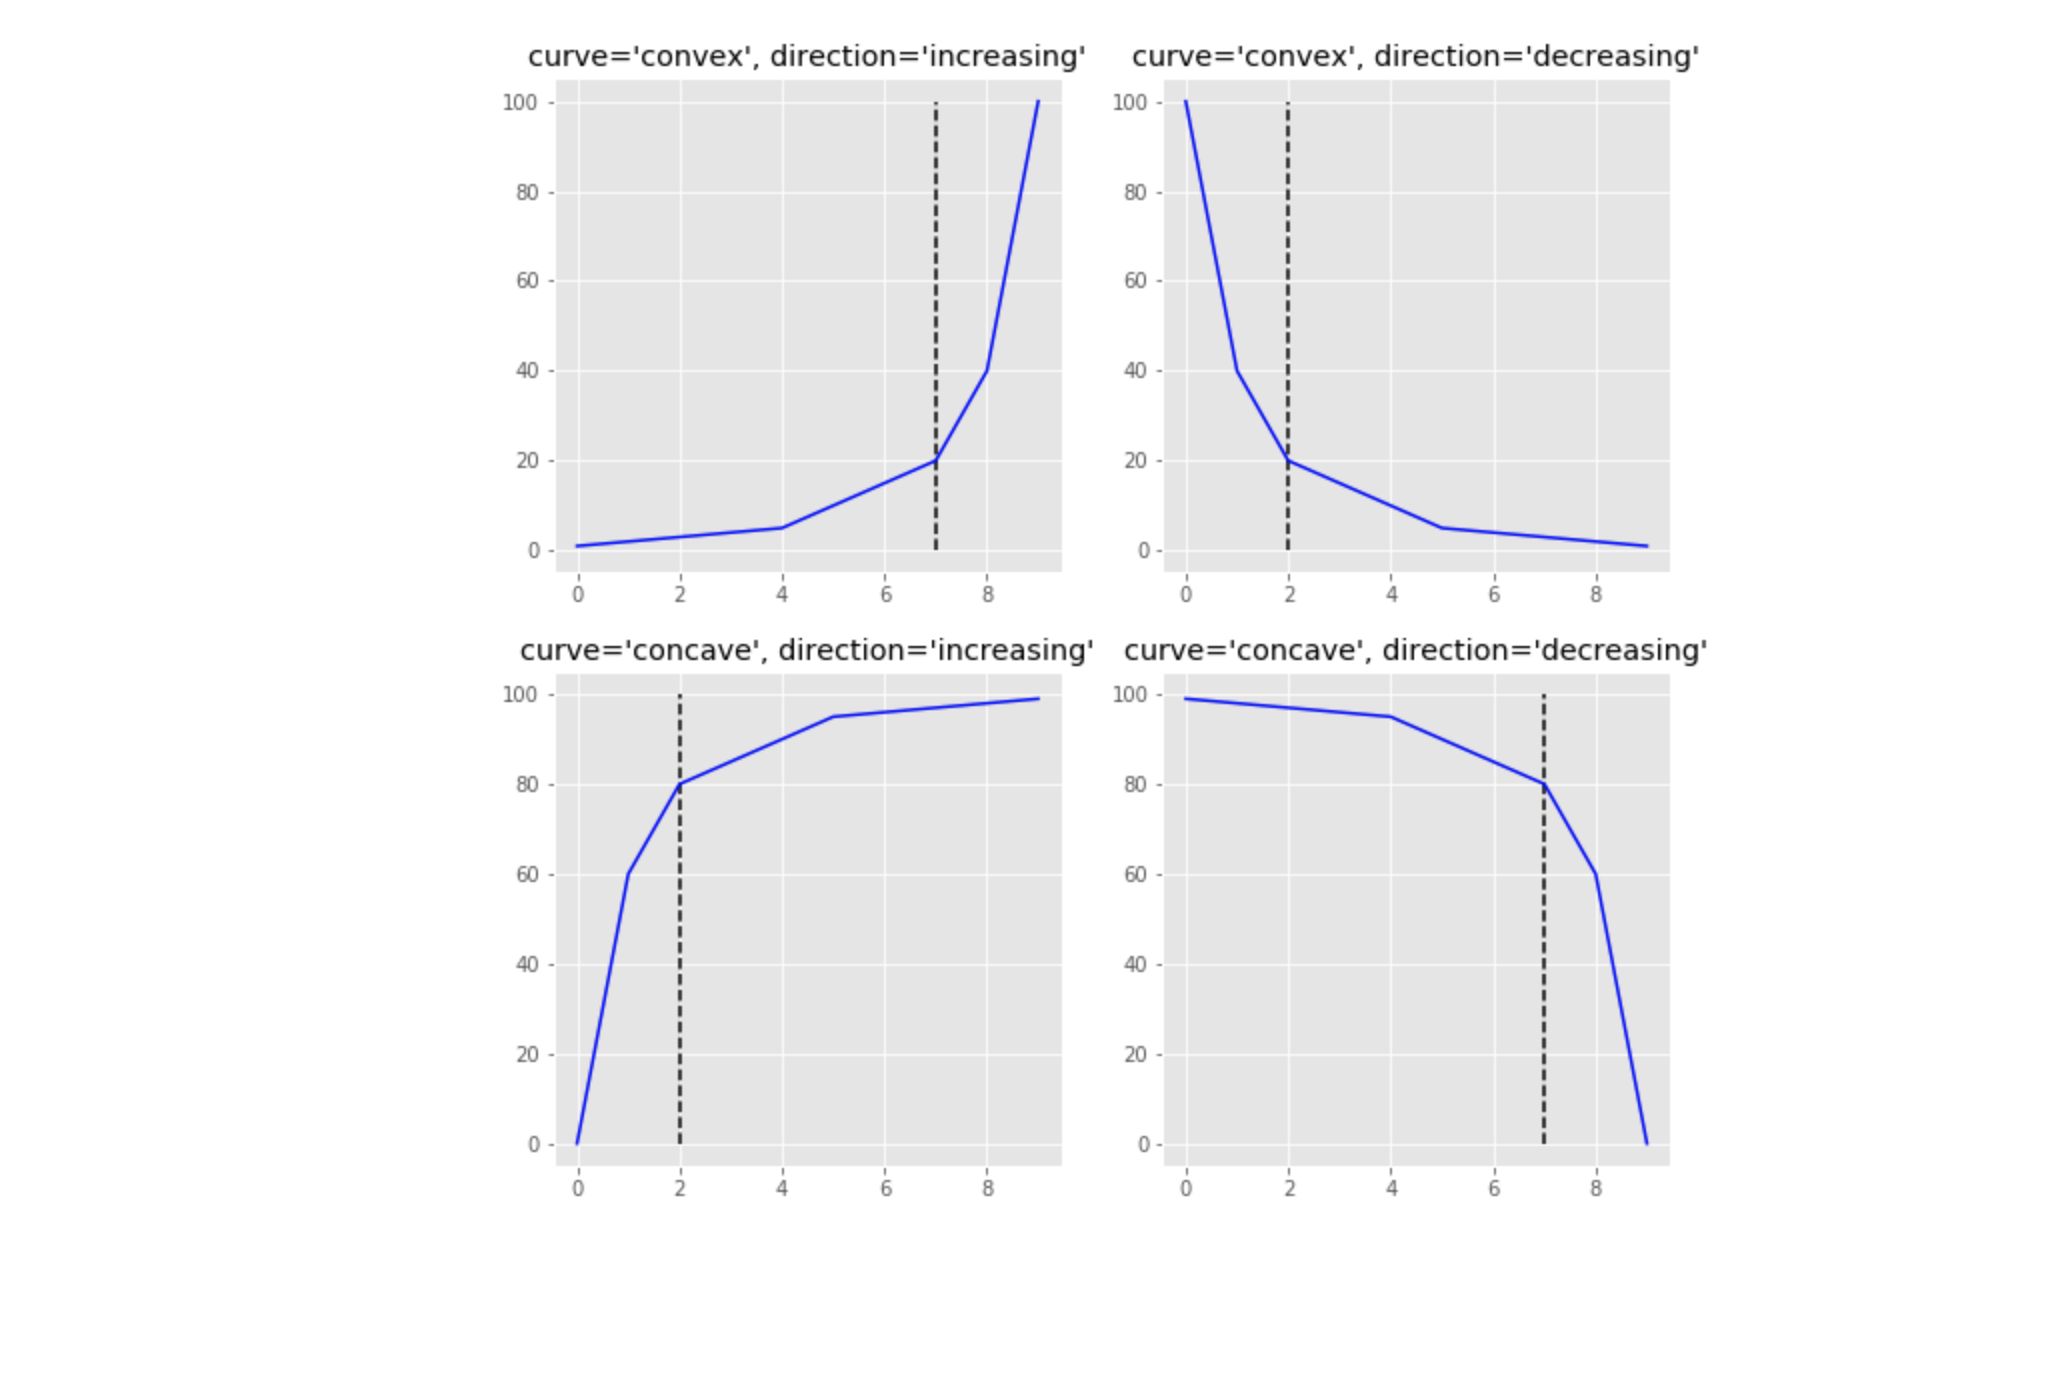

In [26]:
!pip install kneed

In [29]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator
"""
[KneeLocator parameter 참고]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""
kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve='convex', direction='decreasing')
print(f'최적의 k : {round(kneedle.elbow, 3)}')
print(f'최적의 k의 y값 : {round(kneedle.elbow_y, 3)}')

# 볼록 curve plot의 경우, 아래와 같이 knee를 찾습니다.
# print(round(kneedle.knee, 3))
# print(round(kneedle.knee_y, 3))

최적의 k : 3
최적의 k의 y값 : 63.862


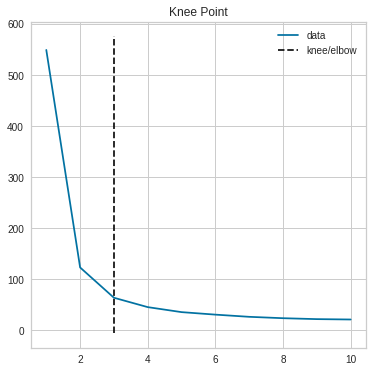

In [30]:
# kneed 모듈에서 간단한 plot 생성도 지원합니다.
kneedle.plot_knee()